In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.transform import Rotation
from tqdm import tqdm

In [2]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
main_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
main_df.columns = main_df.columns.droplevel(0)
df = main_df
# df.head()

In [3]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
# original_df

In [4]:
# pd.options.mode.chained_assignment = None  # default='warn'

center = df['center']

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
# df

In [5]:
rotated = pd.DataFrame(index=df.index, columns=df.columns)
angles = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])
# angles = np.where(angles<0, angles+2*np.pi, angles)

for bodypart in tqdm(df.columns.levels[0]):
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angles)
    sin = np.sin(angles)
    for axis in bp_df.columns:
        if axis == 'x':
            rotated.loc[:, (bodypart, axis)] = (bp_x * cos) + (bp_y * sin)
        elif axis == 'y':
            rotated.loc[:, (bodypart, axis)] = (bp_y * cos) - (bp_x * sin)
        elif axis == 'likelihood':
            rotated.loc[:, (bodypart, axis)] = bp_likelihood

rotated
df = rotated

100%|███████████████| 13/13 [00:01<00:00,  9.55it/s]


In [15]:
df = df.drop(columns=['paw_f_left', 'paw_f_right', 'paw_h_left', 'paw_h_right', 'tail_tip', 'tail_mid'], level=0)

In [30]:
high_likelihood = df.loc[:, df.columns.get_level_values(1) == 'likelihood'] > 0.7
high_likelihood = df.loc[high_likelihood.all(axis=1), :]
high_likelihood = high_likelihood.drop(columns='likelihood', level=1)

In [31]:
high_likelihood

bodyparts   left_ear             right_ear                 snout             \
coords             x          y          x          y          x          y   
7         -24.741779  52.653344 -54.861320  17.718083 -37.473335  68.189429   
8         -27.825290  51.360322 -51.504976  14.289799 -40.159010  65.605442   
9         -27.104689  51.227225 -51.403935  16.322356 -41.057590  64.587529   
10        -24.210801  53.273277 -50.714491  23.012059 -37.796648  68.143201   
11        -23.174391  54.603093 -49.089784  25.278801 -40.963065  67.288474   
...              ...        ...        ...        ...        ...        ...   
101268     -9.544361  54.315737 -51.877632  37.739335 -30.012224  74.725984   
101403    -21.499161  51.050724 -49.902977  25.347701 -54.880095  53.289656   
101475      4.531859  53.999692 -32.632241  35.566492 -24.908360  66.371935   
101490    -49.526700 -10.184263 -30.081885 -46.193748 -70.715696 -41.759025   
101575    -17.127787  51.978362 -51.893212  28.836206 -48.091235  60.340656   

bodyparts center       left_side            right_side             tail_base  \
coords         x    y          x          y          x          y          x   
7           -0.0  0.0  17.478657  29.810831 -13.231966 -32.529675  64.101400   
8           -0.0  0.0  16.688941  29.737847 -18.732883 -31.082195  63.759382   
9           -0.0  0.0  17.896164  30.290980 -19.387330 -30.446968  64.405939   
10          -0.0  0.0  26.121593  28.691603 -16.606418 -28.392372  62.567637   
11          -0.0  0.0  26.057342  30.588606 -15.895269 -28.592537  62.908596   
...          ...  ...        ...        ...        ...        ...        ...   
101268       0.0  0.0  20.553440  44.017730 -48.099069  10.882149  64.460340   
101403       0.0  0.0  16.463441  34.185604 -41.299492 -19.447367  54.314826   
101475       0.0  0.0  28.160982  28.644225 -42.043928 -11.053308  58.266546   
101490      -0.0  0.0 -30.095469  26.038524  18.142821 -35.437679  55.865619   
101575       0.0  0.0  21.428614  34.738402 -36.569732 -29.446796  48.010302   

bodyparts                
coords                y  
7          1.065814e-14  
8         -3.552714e-15  
9         -7.105427e-15  
10         0.000000e+00  
11         1.421085e-14  
...                 ...  
101268    -3.552714e-15  
101403     0.000000e+00  
101475    -3.552714e-15  
101490     0.000000e+00  
101575    -3.552714e-15  

[14412 rows x 14 columns]

In [32]:
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'], ['center', 'left_ear'],
            ['center', 'right_ear'], ['center', 'right_side'], ['left_side', 'center'], ['tail_base', 'center']]

In [62]:
def plotter(to_plot, skeleton, indexes, plot_original_df=False, original_df=None, lim_min=-800, lim_max=800, limits=True):
    plt.figure(figsize=(32,32))
    indexcounter=1
    for i in indexes:
        
        plt.subplot(4,4,indexcounter)
        
        for bp in df.columns.get_level_values(0):
            
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')], cmap='jet', )
            if plot_original_df:
                plt.scatter(x=original_df.loc[i, (bp, 'x')], y=original_df.loc[i, (bp, 'y')], cmap='jet', marker='*')
        
        for bp_pair in skeleton:
            
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)
            if plot_original_df:
                plt.plot([original_df.loc[i, (bp_pair[0], 'x')], original_df.loc[i, (bp_pair[1], 'x')]],
                    [original_df.loc[i, (bp_pair[0], 'y')], original_df.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        if limits:
            plt.xlim(lim_min, lim_max)
            plt.ylim(lim_min, lim_max)
        plt.title('index:' + str(i), fontsize=18)
    
    plt.tight_layout()
    plt.show()

In [ ]:
subset = high_tailbase_likelihood.sample(n=20000)
# subset2 = subset.sample(n=16)
# plotter(to_plot=subset2, skeleton=skeleton, indexes=subset2.index, plot_original_df=True, original_df=original_df, limits=False)

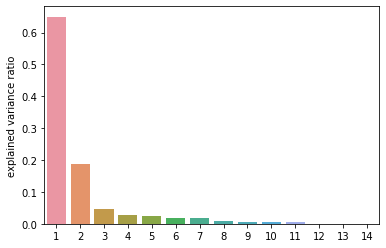

In [34]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, svd_solver='full')

pca_transformed = pca.fit_transform(high_likelihood)

expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1, len(expVar)+1)))

In [37]:
pca_transformed_df = pd.DataFrame(data=pca_transformed, columns=list(range(1, len(expVar)+1)),
                               index=high_likelihood.index)
pca_transformed_df = pca_transformed_df.iloc[:, :11]
pca_transformed_df

,1,2,3,4,5,6,7,8,9,10,11
7,1.822378,1.645462,1.145441,-0.179554,0.697972,-0.142307,-1.279971,0.378344,-0.524546,1.713860,-1.424750
8,1.740749,1.573039,0.937400,-0.322892,0.375433,-0.136642,-0.655784,0.481474,0.359738,1.345131,-1.797404
9,1.752322,1.554453,0.924272,-0.146593,0.168826,-0.139320,-0.675941,0.472207,0.159419,1.073605,-1.763925
10,1.922642,1.724589,0.992998,0.328305,-0.019240,0.175652,-1.241070,1.386012,-0.404553,1.045375,-2.245019
11,1.930704,1.643186,0.828839,0.535743,-0.096769,0.032711,-1.526981,1.252252,-0.406631,0.516807,-2.136106
...,...,...,...,...,...,...,...,...,...,...,...
101268,2.435143,2.228671,0.664034,1.010988,-2.413867,-1.189614,2.399481,2.019848,0.698097,-2.446719,5.221359
101403,1.766829,1.311989,-0.429341,0.095778,-2.280683,-1.339297,0.792624,1.110574,-0.419805,-0.160168,-0.337143
101475,2.249084,2.869714,-0.511628,1.772242,-2.363101,-0.460839,0.523001,0.274874,0.553660,-0.173557,-0.332699
101490,-1.532820,1.080712,-0.641443,0.107450,1.423519,-0.510751,0.099956,0.878980,-0.616892,1.641532,1.699364


tsne fitted in --- 1137.825114250183 seconds ---


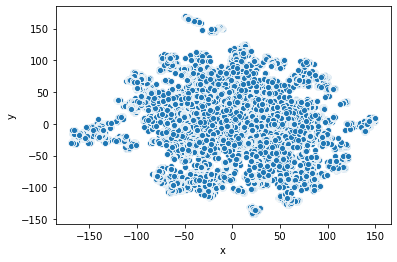

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=20000, n_iter_without_progress=500, init='random', n_jobs=-1)

start_time = time.time()
transformed = tsne.fit_transform(pca_transformed_df)
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

transformed = pd.DataFrame(transformed, columns=['x','y'])
sns.scatterplot(data=transformed, x='x', y='y')

transformed.index = pca_transformed_df.index

In [40]:
print(transformed.index)
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

Int64Index([     7,      8,      9,     10,     11,     17,     18,     19,
                20,     21,
            ...
            101217, 101218, 101219, 101220, 101224, 101268, 101403, 101475,
            101490, 101575],
           dtype='int64', length=14412)
tsne fitted in --- 1245.6970958709717 seconds ---
tsne fitted in --- 1245.6970958709717 seconds ---
tsne fitted in --- 1245.6970958709717 seconds ---
tsne fitted in --- 1245.6970958709717 seconds ---
tsne fitted in --- 1245.6970958709717 seconds ---
tsne fitted in --- 1245.6970958709717 seconds ---


In [42]:
from sklearn.neighbors import KernelDensity

In [68]:
transformed = pd.DataFrame(transformed, columns=['x','y'])

kde = KernelDensity(kernel='gaussian', bandwidth=5)
start_time = time.time()
kde.fit(transformed)
print("fitted in --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
scores = kde.score_samples(transformed)
print("scored in --- %s seconds ---" % (time.time() - start_time))
transformed['score'] = np.exp(scores)

fitted in --- 0.010009288787841797 seconds ---
scored in --- 6.7476232051849365 seconds ---


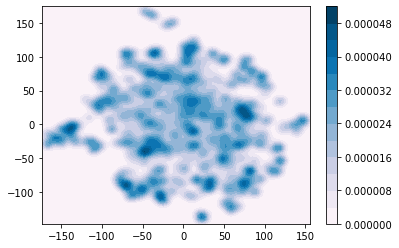

In [69]:
x = np.linspace(transformed['x'].min()-5, transformed['x'].max()+5, 100)
y = np.linspace(transformed['y'].min()-5, transformed['y'].max()+5, 100)
X, Y = np.meshgrid(x, y)

xy = np.vstack([X.ravel(), Y.ravel()]).T

Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 12, cmap='PuBu')
plt.colorbar()

In [45]:
from ipywidgets import interact

In [70]:
@interact
def checkRegion(xmin:(X.min(), X.max()), xmax:(X.min(), X.max()), ymin:(Y.min(), Y.max()), ymax:(Y.min(), Y.max()), lev:(0,30)):
    plt.contourf(X, Y, Z, lev, cmap='PuBu')
    plt.colorbar()
    plt.axhline(ymin)
    plt.axhline(ymax)
    plt.axvline(xmin)
    plt.axvline(xmax)
    print("ymin, ymax, xmin, xmax =", (ymin, ymax, xmin, xmax))

interactive(children=(FloatSlider(value=-9.569564819335938, description='xmin', max=155.06036376953125, min=-1…

Int64Index([3096, 3143, 3164, 3110, 3117, 3075, 3102, 3093, 3118, 3087, 3106,
            3069, 3074, 3145, 3085, 3101],
           dtype='int64')


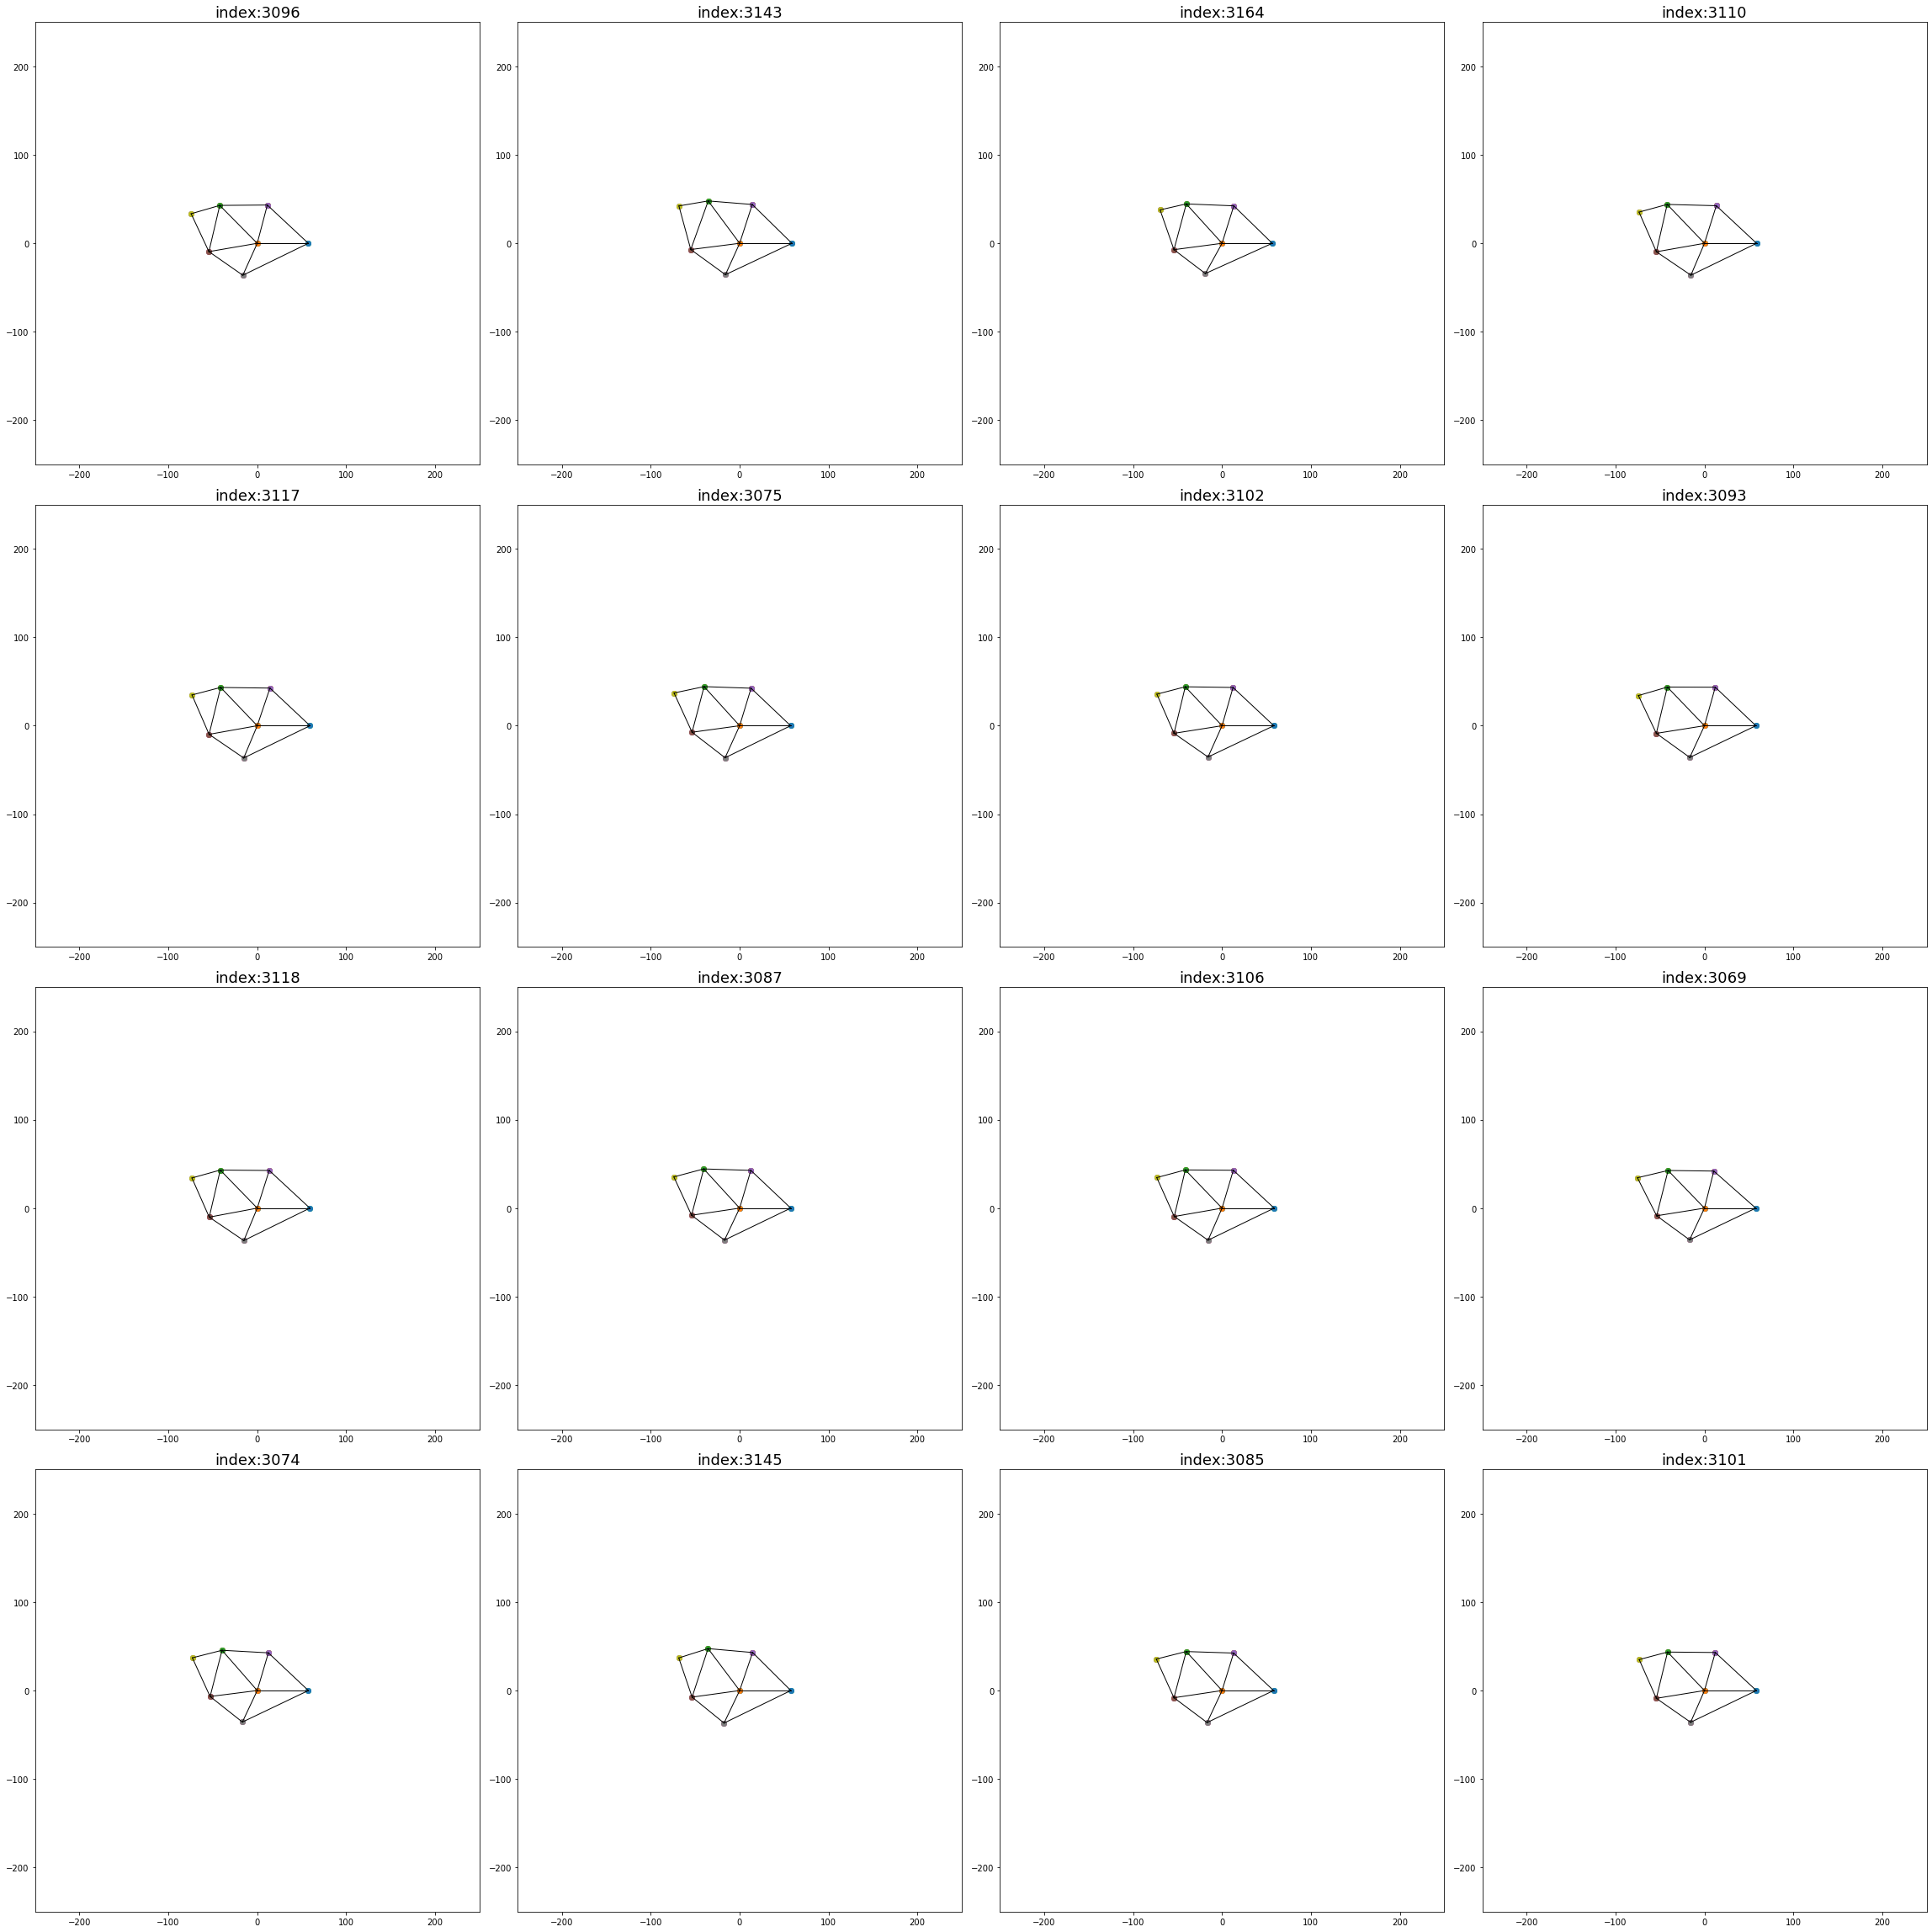

In [71]:
ymin, ymax, xmin, xmax = (-26.54525, -14.44525, -162.49949, -151.29949)

x_filtered = transformed[(transformed['x'] > xmin) & (transformed['x'] < xmax)]
y_filtered = x_filtered[(x_filtered['y'] > ymin) & (x_filtered['y'] < ymax)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(high_likelihood, skeleton, filtered_subset.index, lim_min=-250, lim_max=250)

Int64Index([ 3317,  3315,  3333,  3320,  3345,  1885, 44148,  3349,  3347,
             3353,  3325,  3339,  3354,  3351,  3337,  3311],
           dtype='int64')


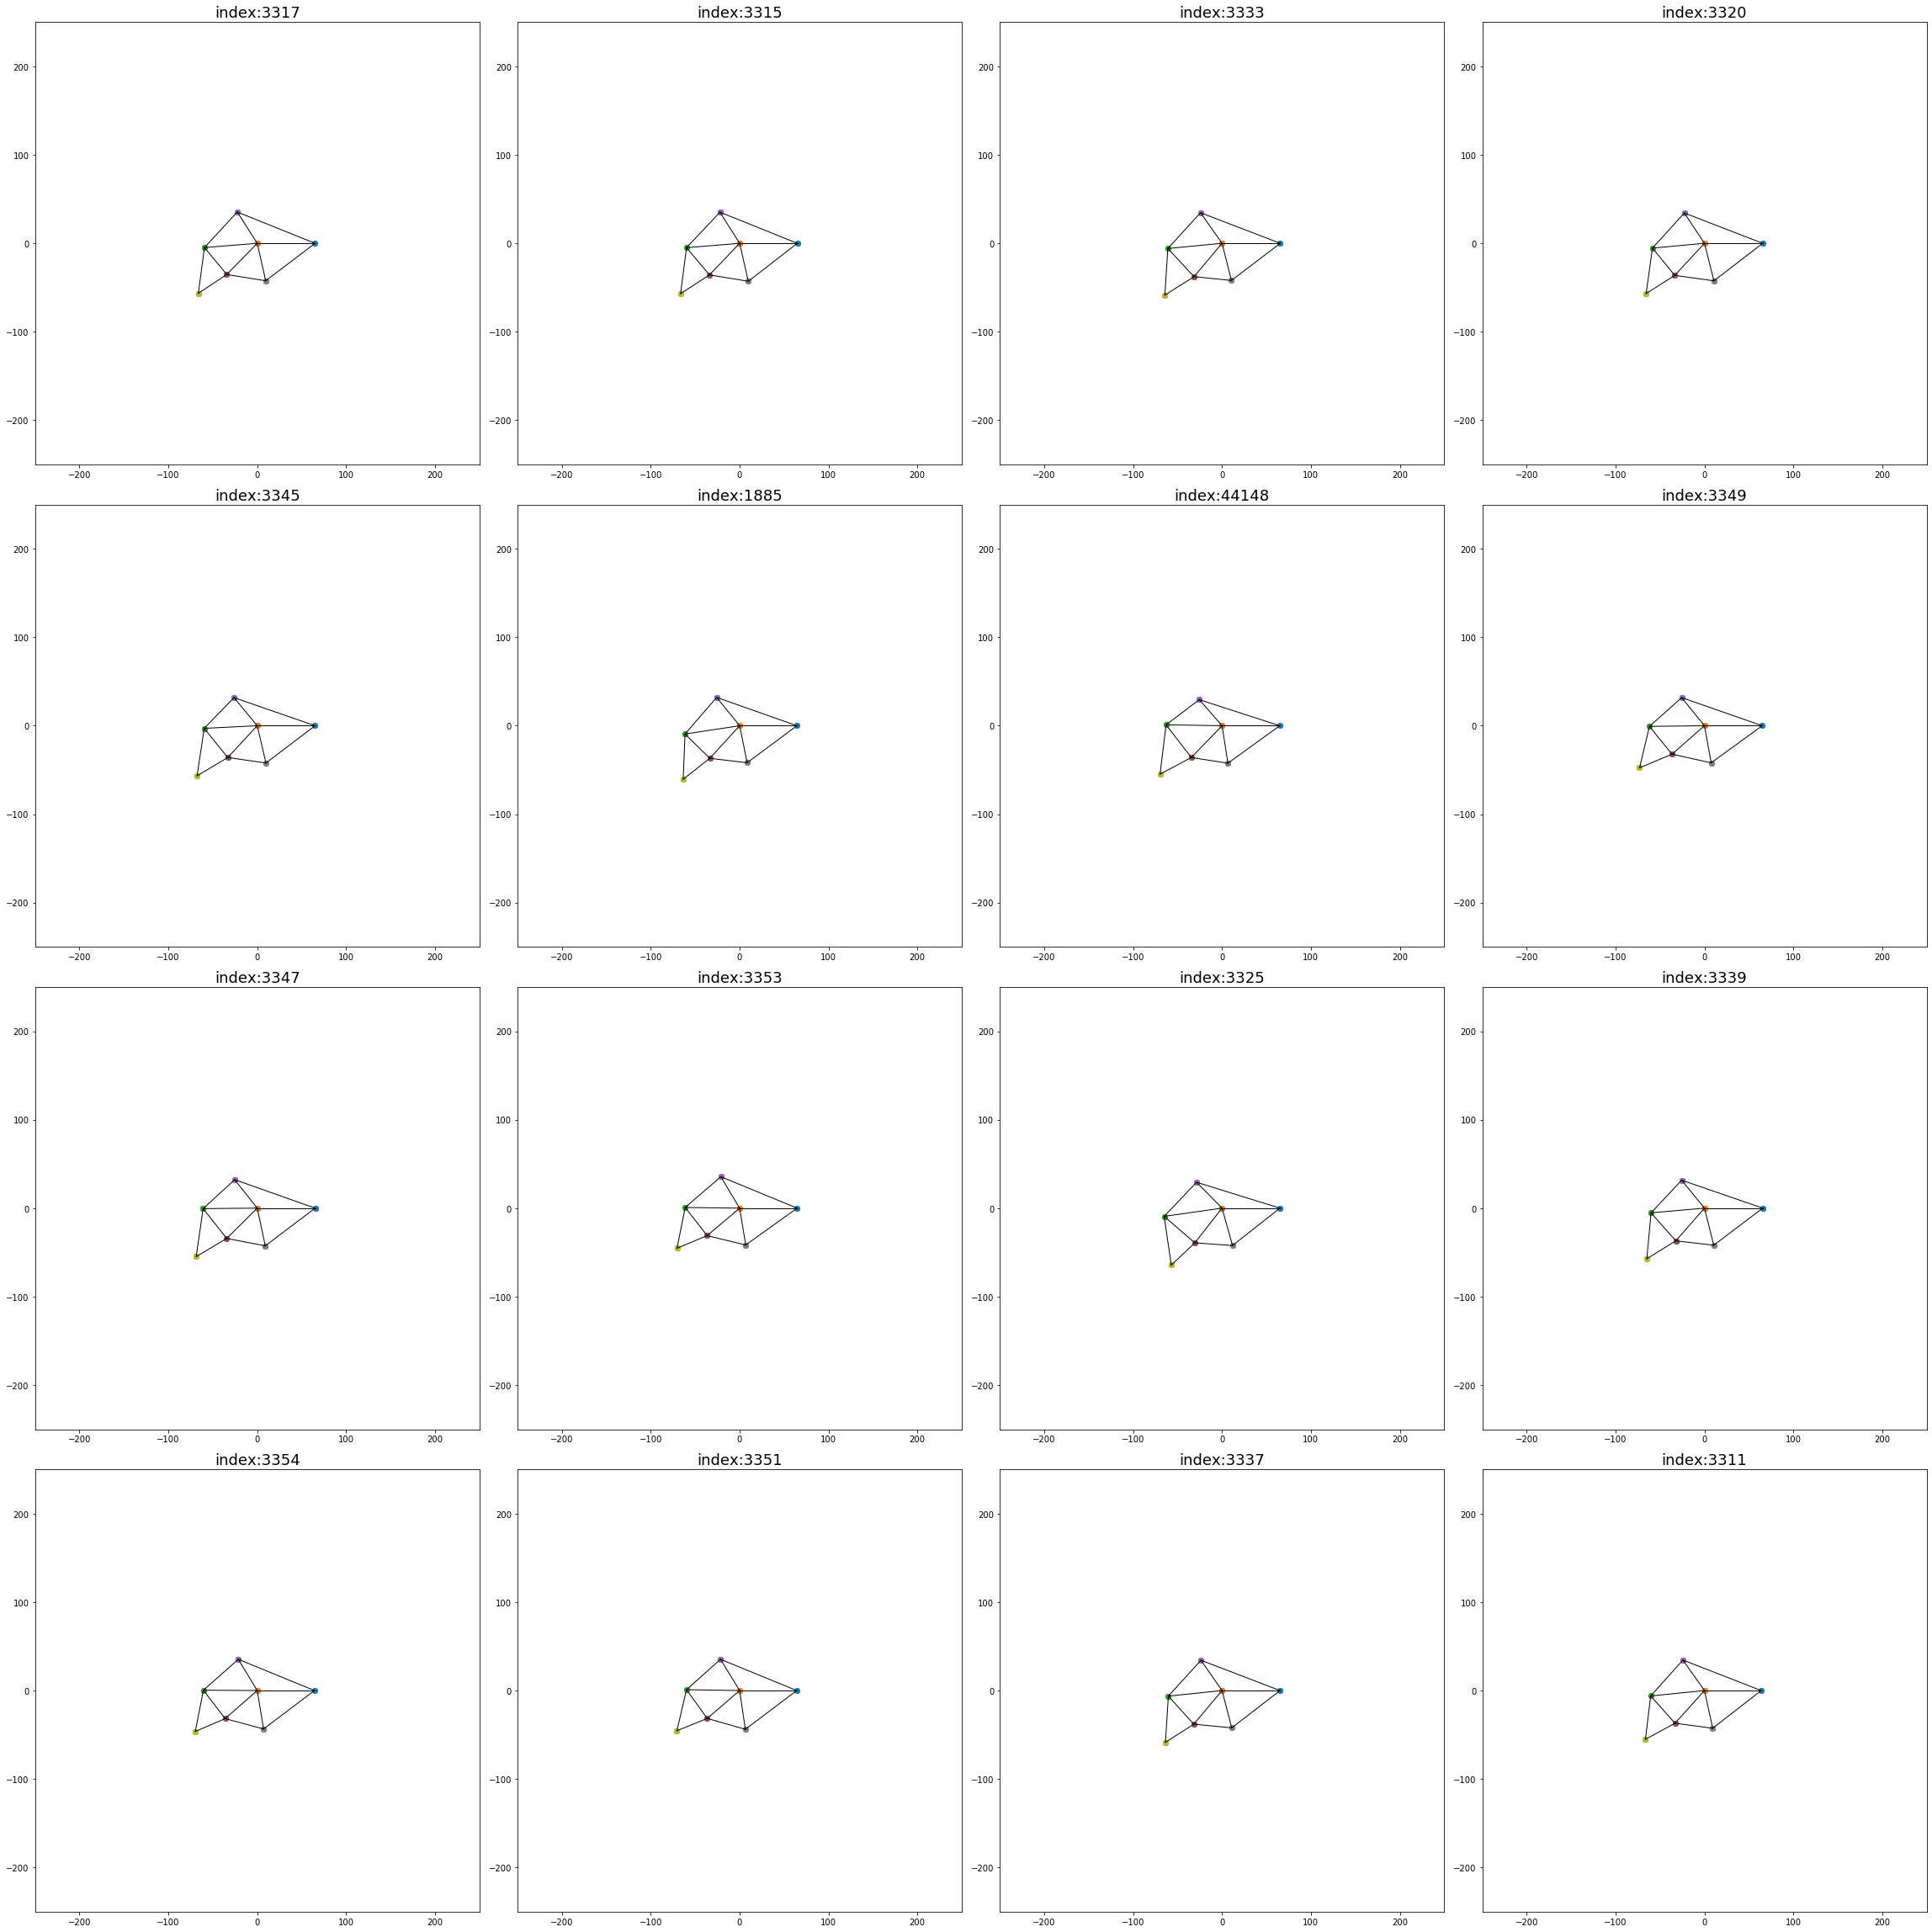

In [72]:
ymin, ymax, xmin, xmax = (-92.24525, -80.54525, 69.40051, 77.70051)

x_filtered = transformed[(transformed['x'] > xmin) & (transformed['x'] < xmax)]
y_filtered = x_filtered[(x_filtered['y'] > ymin) & (x_filtered['y'] < ymax)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(high_likelihood, skeleton, filtered_subset.index, lim_min=-250, lim_max=250)

Int64Index([19769,   393,   387,   389,   404, 19590, 16833,   386, 19672,
            19589, 21021, 20421, 26439,   405,   390,   403],
           dtype='int64')


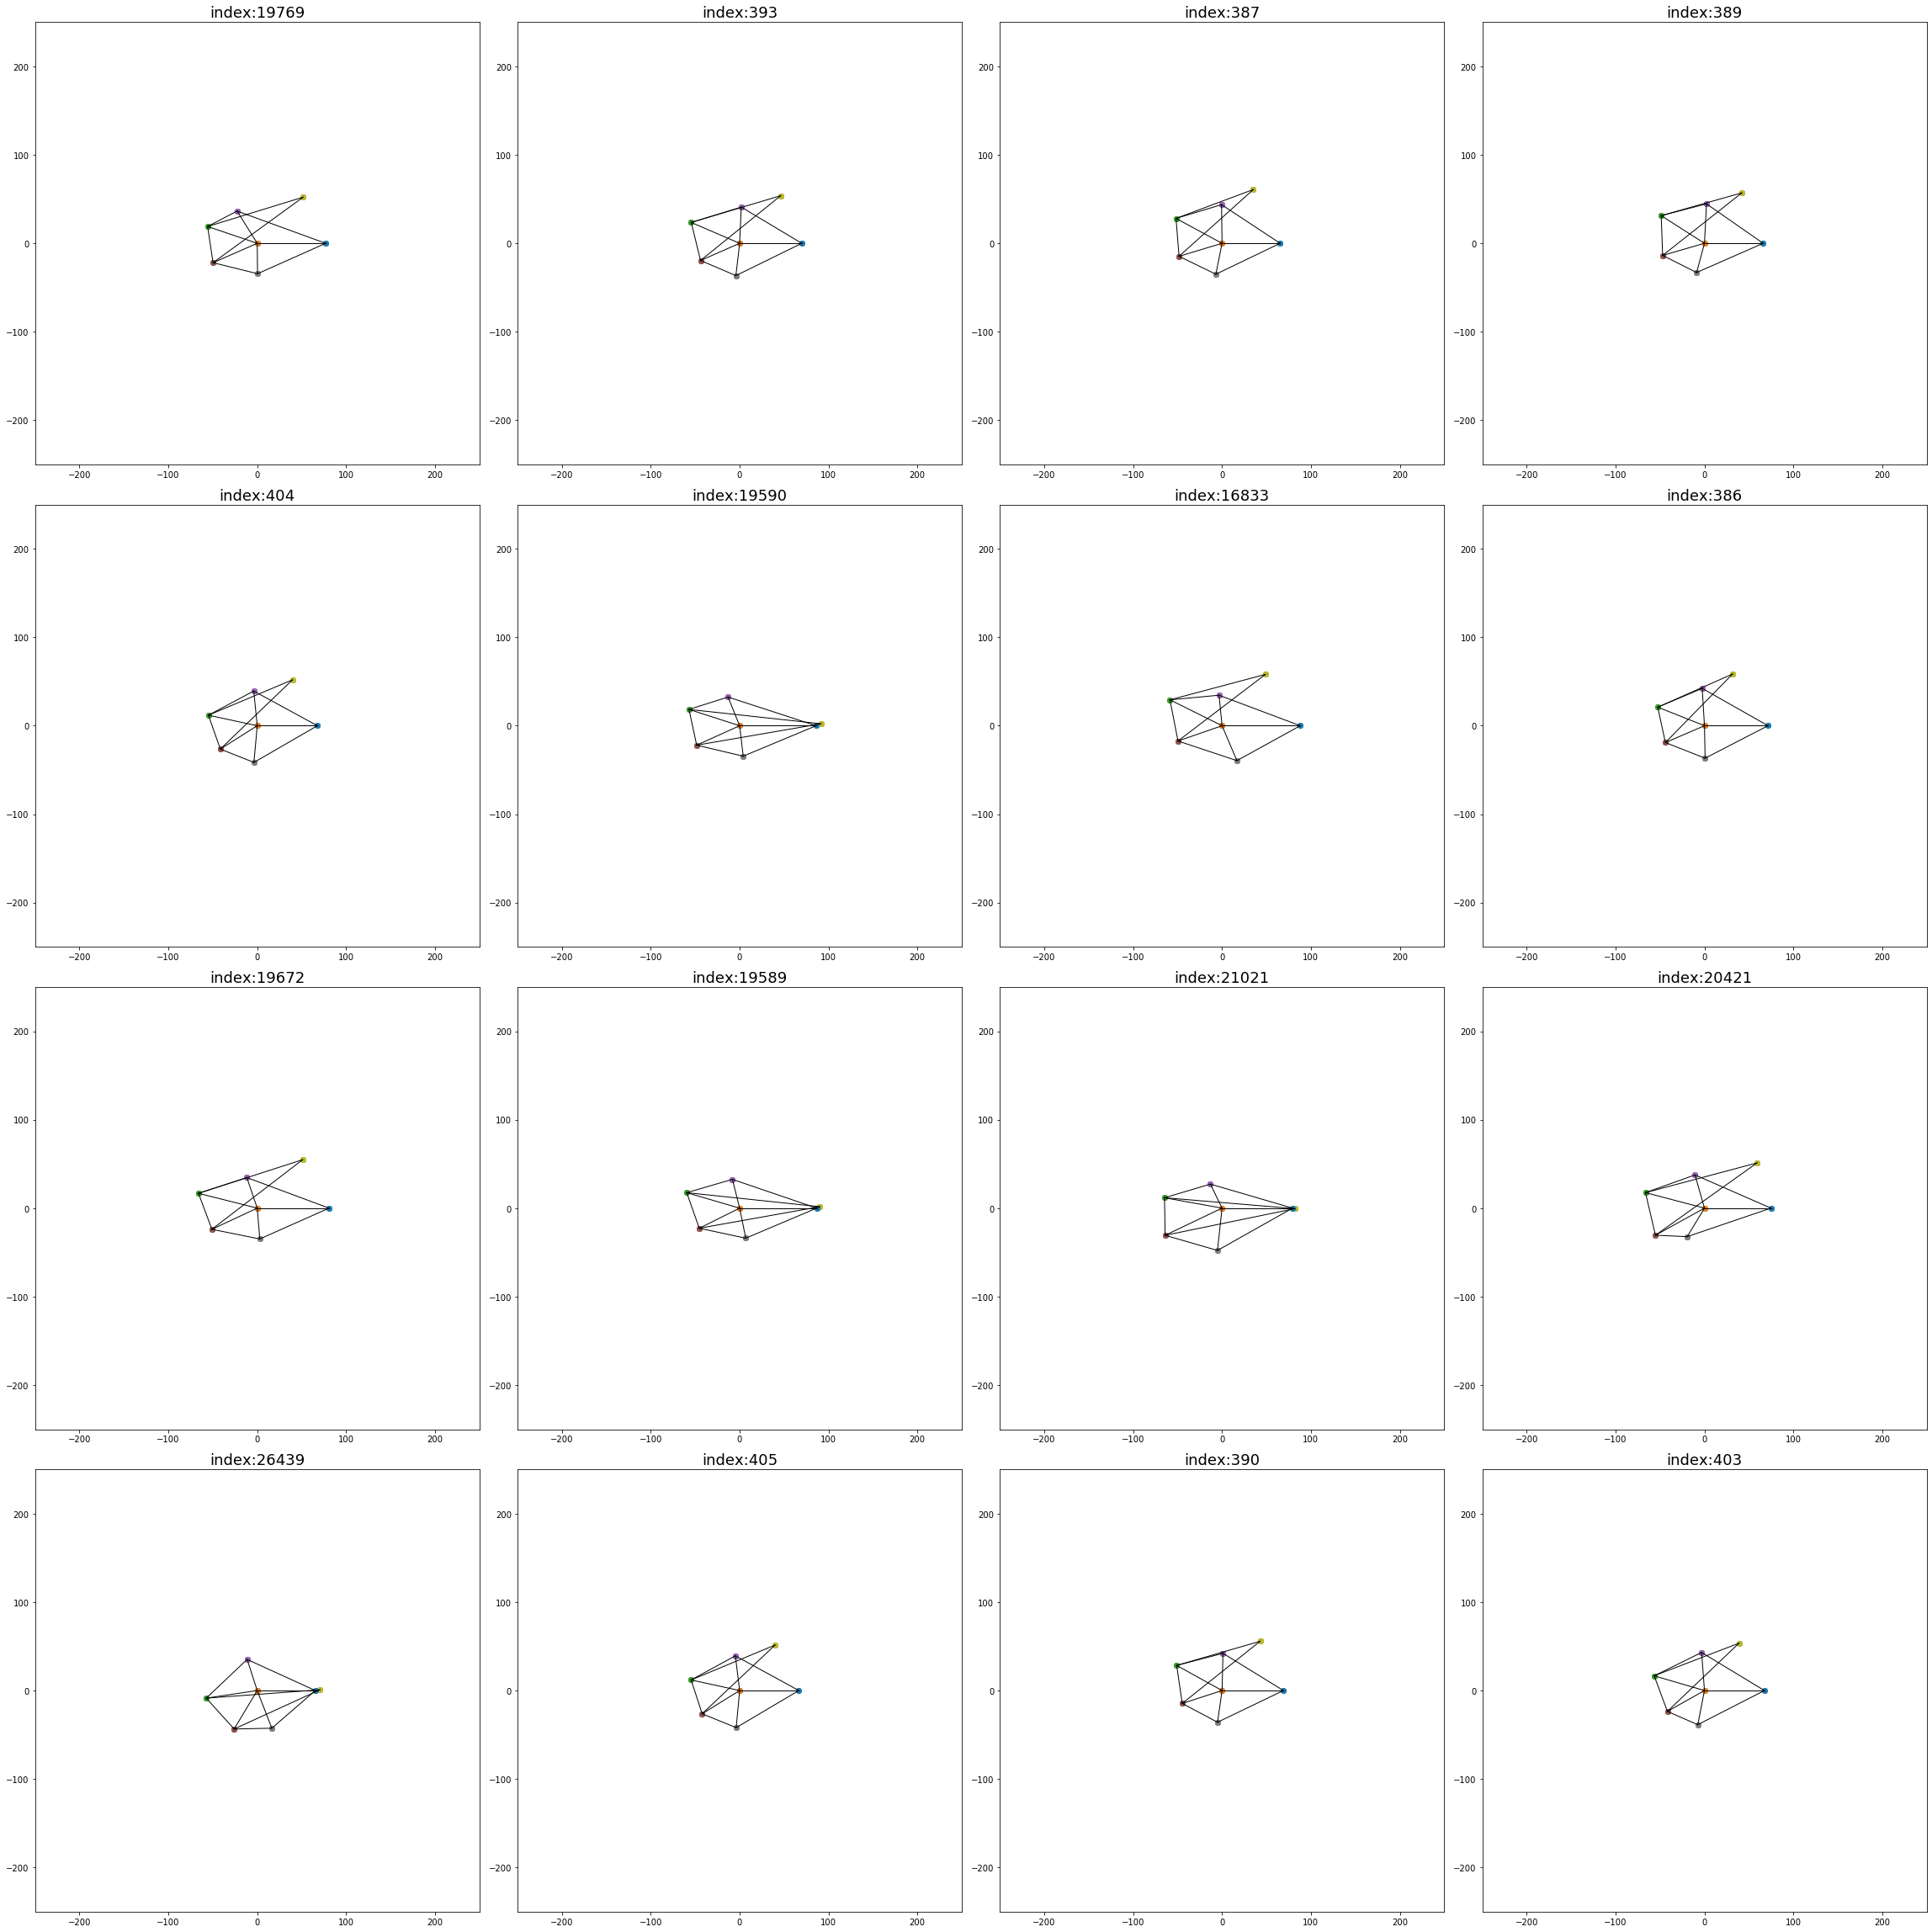

In [73]:
ymin, ymax, xmin, xmax = (160.0, 167.0, -44.99949, -38.29949)

x_filtered = transformed[(transformed['x'] > xmin) & (transformed['x'] < xmax)]
y_filtered = x_filtered[(x_filtered['y'] > ymin) & (x_filtered['y'] < ymax)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(high_likelihood, skeleton, filtered_subset.index, lim_min=-250, lim_max=250)

fitted in --- 0.14393877983093262 seconds ---
clusters:  17


0.06751318345822925

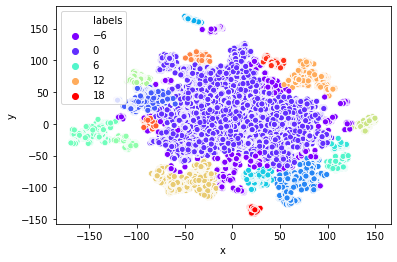

In [176]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=10, min_samples=100, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=3, n_jobs=-1)

start_time = time.time()
labels = dbs.fit_predict(transformed)
print("fitted in --- %s seconds ---" % (time.time() - start_time))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('clusters: ', n_clusters_)

trl = transformed.copy(deep=True)
trl['labels'] = labels
sns.scatterplot(data=trl, x='x', y='y', hue='labels', palette='rainbow')
(labels == -1).mean()

In [177]:
labels

array([-1, -1, -1, ...,  1,  2,  1], dtype=int64)

In [141]:
trl.loc[[ 3317,  3315,  3333,  3320,  3345,  1885, 44148,  3349,  3347,
             3353,  3325,  3339,  3354,  3351,  3337,  3311], :]

,x,y,score,labels
3317,75.005127,-88.797989,0.000042,9
3315,74.874603,-88.405457,0.000042,9
3333,73.320122,-88.367783,0.000042,9
3320,74.856384,-88.615051,0.000042,9
3345,71.808960,-86.246605,0.000040,9
1885,76.256599,-89.337540,0.000041,9
44148,70.006927,-85.512619,0.000036,9
3349,73.059410,-84.620560,0.000039,9
3347,71.744514,-85.908539,0.000039,9
3353,74.709915,-86.361092,0.000042,9


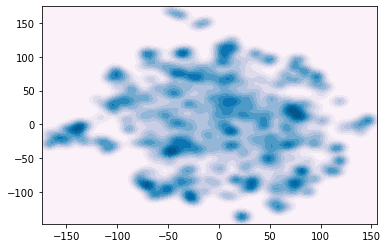

In [98]:
plt.contourf(X, Y, Z, 12, cmap='PuBu')

(100, 100)

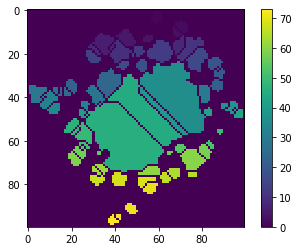

In [282]:
from skimage.filters import threshold_otsu

image=Z
thresh = threshold_otsu(image)
binary = image > thresh

image=binary

distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False,
                            labels=image)

markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image, watershed_line=True)

plt.imshow(labels)
plt.colorbar()
labels.shape

In [74]:
import pims
vid = pims.Video(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3.mp4")
frames = []
for index in filtered_subset.index:
    frames.append(vid[index])
    
outputfolder = r"C:\Users\serce\Desktop\inspect"

for n, frame in enumerate(frames):
    plt.imsave(r"C:\Users\serce\Desktop\inspect" + "\\" + str(n) + ".png", frame)

C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\pims\pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


In [ ]:
print(original_df.iloc[39631])

In [ ]:
plt.imshow(Z)
plt.colorbar()

----------------------------------------

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=30, init='k-means++', n_init=30, max_iter=3000, tol=0.0001, algorithm='auto')
transformed_km = km.fit_transform(subset)

In [ ]:
sns.scatterplot(data=transformed, x='x', y='y', hue=km.labels_)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, svd_solver='full')

pca_transformed = pca.fit_transform(subset)

expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1,40)))

In [ ]:
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=km.labels_)

In [ ]:
#index = transformed[transformed['y'] < 28].index

#to_plot = df.iloc[index, :]

#plotter(subset, skeleton, to_plot.index[:16])

In [ ]:
pca_transformed.shape